In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from skimage import morphology as mo
from skimage.morphology import skeletonize

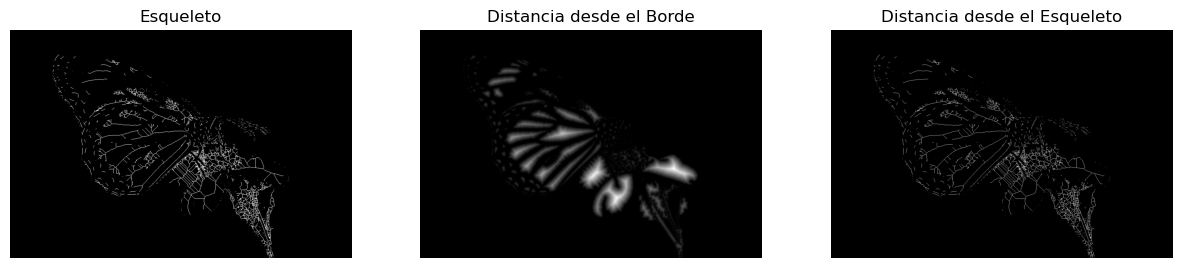

In [11]:
# Cargar la imagen binaria
img = cv.imread('assets/butterfly.jpeg')
gImg = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
_, binary = cv.threshold(gImg, 127, 255, cv.THRESH_BINARY)

# 1. Esqueletización
skeleton = skeletonize(binary > 0)  # skimage usa booleanos

# 2. Transformada de distancia desde el borde
dist_transform = cv.distanceTransform(binary, cv.DIST_L2, 5)

# 3. Transformada de distancia desde el esqueleto
skeleton_uint8 = (skeleton * 255).astype(np.uint8)  # Convertir a uint8 para OpenCV
dist_transform_skeleton = cv.distanceTransform(skeleton_uint8, cv.DIST_L2, 5)

# Graficar los resultados
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
titles = ["Esqueleto", "Distancia desde el Borde", "Distancia desde el Esqueleto"]
images = [skeleton, dist_transform, dist_transform_skeleton]

for ax, img, title in zip(axes, images, titles):
    ax.imshow(img, cmap="gray")
    ax.set_title(title)
    ax.axis("off")

plt.show()

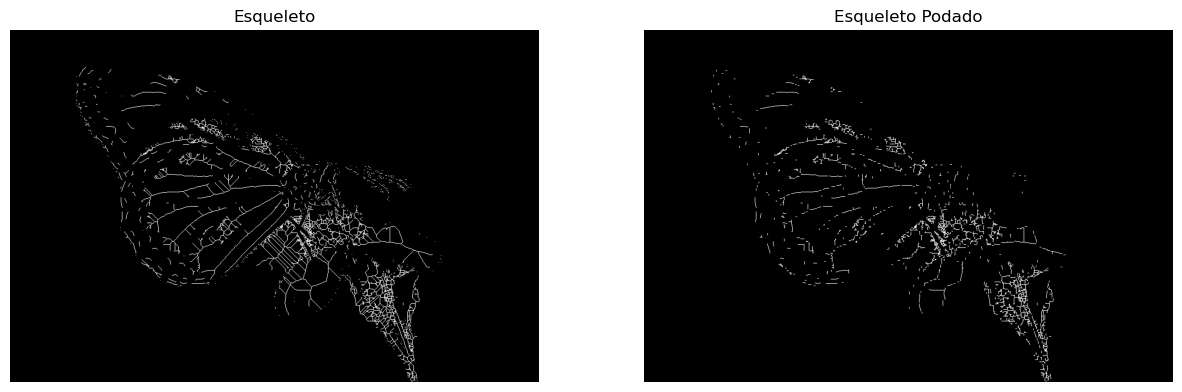

In [14]:
# 1. Esqueletización
skeleton = skeletonize(binary > 0)  # skimage usa booleanos

# Prunning del esqueleto
from skimage.morphology import skeletonize, remove_small_objects
skeleton_pruned = remove_small_objects(skeleton, min_size=3)  # Ajusta min_size según sea necesario

# 2. Transformada de distancia desde el borde
dist_transform = cv.distanceTransform(binary, cv.DIST_L2, 5)

# 3. Transformada de distancia desde el esqueleto
skeleton_uint8 = (skeleton_pruned * 255).astype(np.uint8)  # Convertir a uint8 para OpenCV
dist_transform_skeleton = cv.distanceTransform(skeleton_uint8, cv.DIST_L2, 5)

# Graficar los resultados
fig, axes = plt.subplots(1, 2, figsize=(15, 5))  # Aumentar el número de subgráficas
titles = ["Esqueleto", "Esqueleto Podado"]
images = [skeleton, skeleton_pruned]

for ax, img, title in zip(axes, images, titles):
    ax.imshow(img, cmap="gray")
    ax.set_title(title)
    ax.axis("off")

plt.show()